#Supervised machine learning on Airbnb dataset 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df=pd.read_csv(r"/content/sample_data/AB_NYC_2019.csv")

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


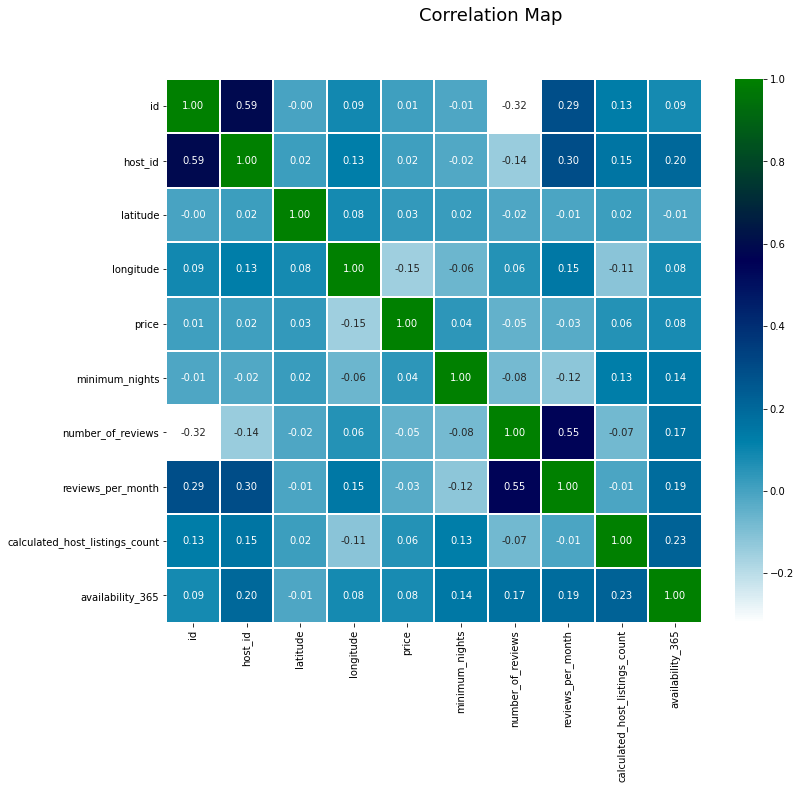

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=1,cmap="ocean_r",fmt=".2f")
plt.suptitle("Correlation Map",fontsize=18)
plt.show()


In [ ]:
pd.DataFrame(round(df.isnull().sum()/df.shape[0] * 100,3), columns = ['Missing'])

,Missing
id,0.000
name,0.033
host_id,0.000
host_name,0.043
neighbourhood_group,0.000
neighbourhood,0.000
latitude,0.000
longitude,0.000
room_type,0.000
price,0.000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

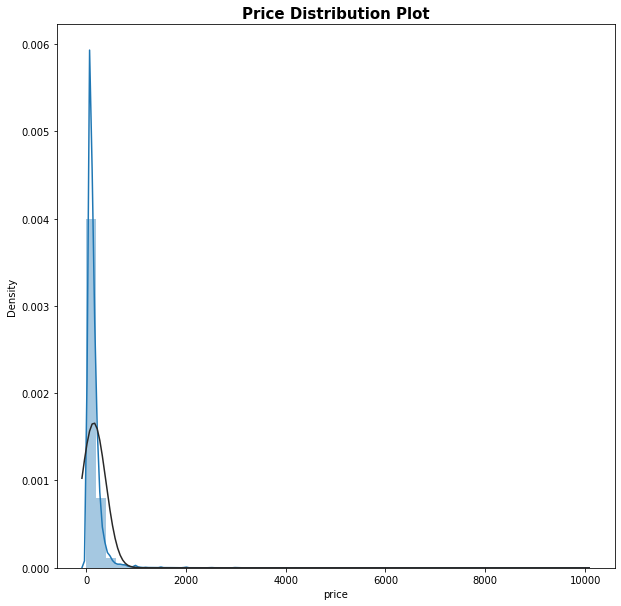

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(10,10))
sns.distplot(df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

SINCE IT IS RIGHTLY SKEWED LOG TRANSFORMATION WILL BE USED TO MAKE THIS FEATURE LESS SKEWED

CONVERTING INTO NORMAL DISTRIBUTION

In [ ]:
df['price'] = np.log(df.price+1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

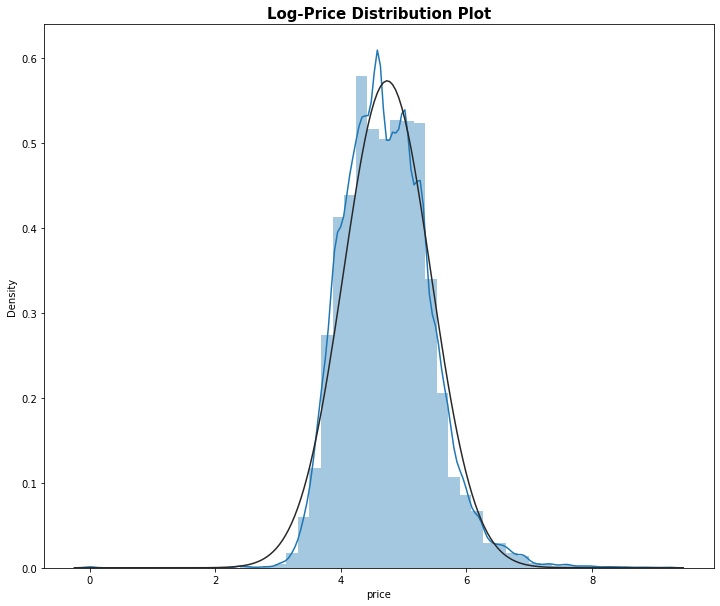

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(df['price'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

# Data Preprocessing

In [ ]:
#fill missing values for last review and reviews per month with 0
df[["last_review", "reviews_per_month"]] = df[["last_review", "reviews_per_month"]].fillna(0)

In [ ]:
#if there is no host name or listing name fill in None
df[["name", "host_name"]] = df[["name", "host_name"]].fillna("None")

In [ ]:
#Drop rows were price of the listing is 0. We are not intersted in "free" 
#listings as they are most likely an error.
free = len(df[df.price == 0])
data = df[df.price != 0].copy()

In [ ]:
df.replace({'room_type': {"Entire home/apt": 1,'Private room':0,'Shared room': 0}},inplace=True)

In [ ]:
cols=['neighbourhood','neighbourhood_group','name','host_id','host_name']
df=df.drop(cols,axis=1)

In [ ]:
df.columns

Index(['id', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  int64  
 4   price                           48895 non-null  float64
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   last_review                     48895 non-null  object 
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 4.1+ MB


In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [ ]:
df['last_review']=pd.to_numeric(df['last_review'])

#Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('room_type',axis=1)
y = df['room_type']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=7)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients:\n {}'.format(str(reg.coef_)))
print('\nIntercept:', reg.intercept_)
print('\nRMSE: {}'.format(np.sqrt(mean_squared_error(y_train, reg.predict(X_train)))))
print('\nR^2 train: {}'.format(reg.score(X_train, y_train)))

Coefficients:
 [-2.51272054e-09 -8.60891437e-31 -1.10223187e-18  4.29710269e-18
  1.22466622e-16  2.93446962e-15  2.57359630e-21 -8.75940650e-17
 -8.83928334e-16 -2.79807006e-15]

Intercept: 0.5639147510936575

RMSE: 0.49884645838490765

R^2 train: 0.003119352865242342


In [ ]:
print('Coefficients:\n {}'.format(str(reg.coef_)))
print('\nIntercept:', reg.intercept_)
print('\n' + 'RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))))
print('\nR^2 train: {}'.format(reg.score(X_test, y_test)))

Coefficients:
 [-2.51272054e-09 -8.60891437e-31 -1.10223187e-18  4.29710269e-18
  1.22466622e-16  2.93446962e-15  2.57359630e-21 -8.75940650e-17
 -8.83928334e-16 -2.79807006e-15]

Intercept: 0.5639147510936575

RMSE: 0.4988841440609175

R^2 train: 0.002696783714485007


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop('room_type',axis=1)
y = df['room_type']

In [ ]:
seed = 7
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=7)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
model.predict_proba(X_test)

array([[0.47805605, 0.52194395],
       [0.47784601, 0.52215399],
       [0.47889133, 0.52110867],
       ...,
       [0.47751169, 0.52248831],
       [0.47883166, 0.52116834],
       [0.47954148, 0.52045852]])

In [ ]:
model.score(X_test,y_test)

0.5235709172717047

In [ ]:
# with statsmodels
import statsmodels.api as sm
# adding a constant
 
model = sm.Logit(y_train, X_train).fit()
predictions = model.predict(X_train) 
 
print_model = model.summary()
print(print_model)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.423199
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              room_type   No. Observations:                39116
Model:                          Logit   Df Residuals:                    39114
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 Jan 2021   Pseudo R-squ.:                  0.3888
Time:                        09:38:23   Log-Likelihood:                -16554.
converged:                       True   LL-Null:                       -27084.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
id                             -1.074e-08   1.57e-09     -6.838     

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


#Build the model
clf = LogisticRegression()

# Train the classifier
clf.fit(X_train, y_train)

#test the model
y_pred = clf.predict(X_test)

#classification report
cr = (classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
confm = confusion_matrix(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print("Confusion Matrix: \n", confm)
print("Precision: ", pre)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Confusion Matrix: 
 [[1026 3658]
 [1001 4094]]
Precision:  0.5281217750257998
Recall:  0.8035328753680079
F1 Score:  0.6373472406009186


Text(0.5, 15.0, 'Predicted label')

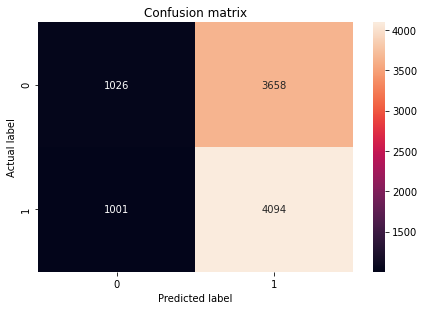

In [ ]:
sns.heatmap(pd.DataFrame(confm), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5235709172717047

In [ ]:
print('\n' + 'RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, clf.predict(X_train)))))
print('\nR^2 train: {}'.format(clf.score(X_train, y_train)))


RMSE: 0.6956433164225782

R^2 train: 0.5160803763165968


In [ ]:
print('\n' + 'RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))))
print('\nR^2 train: {}'.format(clf.score(X_test, y_test)))


RMSE: 0.6902384245521944

R^2 train: 0.5235709172717047


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.51      0.22      0.31      4684
           1       0.53      0.80      0.64      5095

    accuracy                           0.52      9779
   macro avg       0.52      0.51      0.47      9779
weighted avg       0.52      0.52      0.48      9779



#Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
model.score(X_test,y_test)

0.5144863317199536

In [ ]:
y_pred1=model.predict(X_test[0:10])

In [ ]:
model.predict_proba(X_test[:10])

array([[0.50623166, 0.49376834],
       [0.47035161, 0.52964839],
       [0.47026235, 0.52973765],
       [0.47031103, 0.52968897],
       [0.47044388, 0.52955612],
       [0.47026377, 0.52973623],
       [0.50623166, 0.49376834],
       [0.47023493, 0.52976507],
       [0.4704355 , 0.5295645 ],
       [0.47023168, 0.52976832]])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.52132632, 0.51716581, 0.51176041, 0.52125639, 0.5230095 ])

In [ ]:
print('\n' + 'RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print('\nR^2 train: {}'.format(model.score(X_train, y_train)))


RMSE: 0.6936110167972879

R^2 train: 0.5189037573774323


In [ ]:
print('\n' + 'RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))
print('\nR^2 train: {}'.format(model.score(X_test, y_test)))


RMSE: 0.6967881085954656

R^2 train: 0.5144863317199536


#Lasso Regression

In [ ]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('price',axis=1)
y = df['price']

In [ ]:
scaler=MinMaxScaler()

scaler.fit(df[['latitude']])
df['latitude']=scaler.transform(df[['latitude']])

scaler.fit(df[['longitude']])
df['longitude']=scaler.transform(df[['longitude']])

scaler.fit(df[['room_type']])
df['room_type']=scaler.transform(df[['room_type']])

scaler.fit(df[['price']])
df['price']=scaler.transform(df[['price']])

scaler.fit(df[['minimum_nights']])
df['minimum_nights']=scaler.transform(df[['minimum_nights']])

scaler.fit(df[['number_of_reviews']])
df['number_of_reviews']=scaler.transform(df[['number_of_reviews']])

scaler.fit(df[['calculated_host_listings_count']])
df['calculated_host_listings_count']=scaler.transform(df[['calculated_host_listings_count']])

scaler.fit(df[['availability_365']])
df['availability_365']=scaler.transform(df[['availability_365']])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=31)

In [ ]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

In [ ]:
coeff_used = np.sum(lasso.coef_!=0)
coeff_used

5

In [ ]:
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.027522057667814015
test score:  0.03312144583130816
number of features used:  5


In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01 is ", coeff_used001)

training score for alpha=0.01: 0.39774844170270907
test score for alpha =0.01:  0.40558600709307513
number of features used: for alpha =0.01 is  7


In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.4564077537576994
test score for alpha =0.0001:  0.4595692903695595
number of features used: for alpha =0.0001: 10


In [ ]:
print('\n' + 'RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, lasso00001.predict(X_train)))))
print('\nR^2 train: {}'.format(lasso00001.score(X_train, y_train)))


RMSE: 0.5144692606956212

R^2 train: 0.4564077537576994


In [ ]:
print('\n' + 'RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, lasso00001.predict(X_test)))))
print('\nR^2 train: {}'.format(lasso00001.score(X_test, y_test)))


RMSE: 0.5069043497070567

R^2 train: 0.4595692903695595


#Ridge Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
print (len(X_train), len(y_train))
print (len(X_test), len(y_test))

34226 34226
14669 14669


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; 
#low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.5408e-39): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.17928e-38): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [ ]:
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.007409725964519387
linear regression test score: 0.00830485869269404
ridge regression train score low alpha: 0.4598301736637802
ridge regression test score low alpha: 0.45127523578679474
ridge regression train score high alpha: 0.43930161760806674
ridge regression test score high alpha: 0.43158029473373716


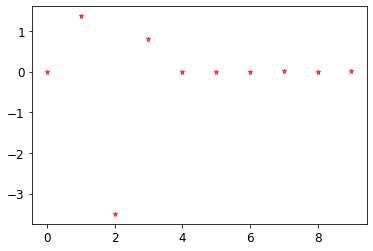

In [ ]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
# zorder for ordering the markers

plt.show()

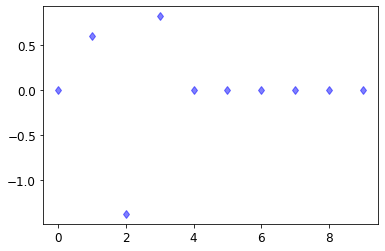

In [ ]:
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
# alpha here is for transparency
plt.show()

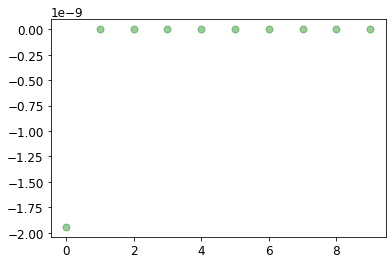

In [ ]:
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.show()

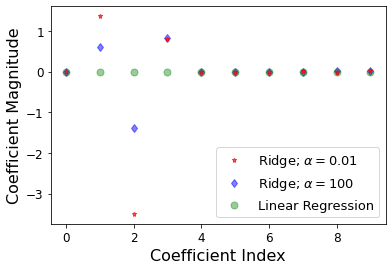

In [ ]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [ ]:
print('\n' + 'RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, rr.predict(X_train)))))
print('\nR^2 train: {}'.format(rr.score(X_train, y_train)))


RMSE: 0.5084430394834457

R^2 train: 0.4598301736637802


In [ ]:
print('\n' + 'RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, rr.predict(X_test)))))
print('\nR^2 train: {}'.format(rr.score(X_test, y_test)))


RMSE: 0.5210812079888424

R^2 train: 0.45127523578679474


#Decision Tree

In [ ]:
X = df.drop(['price'], axis=1) ## Independent variable
y = df['price'] ## Dependent variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train, y_train)


dtree_pred = dtree.predict(X_test)

r2 = r2_score(y_test,dtree_pred)
print('R-Square Score: ',r2*100)

# Calculate the absolute errors
dtree_errors = abs(dtree_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(dtree_pred), 2), 'degrees.')

R-Square Score:  21.063501147603468
Mean Absolute Error: 0.52 degrees.


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('mse:',mean_squared_error(y_test, dtree_pred))
print('mae:',mean_absolute_error(y_test, dtree_pred))
print('rmse', np.sqrt(mean_absolute_error(y_test, dtree_pred)))

mse: 0.004397802203796303
mae: 0.047059260970737066
rmse 0.2169314660687496


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)

rf_pred = random_forest_regressor.predict(X_test)

r2 = r2_score(y_test,rf_pred)
print('R-Square Score: ',r2*100)

# Calculate the absolute errors
rf_errors = abs(rf_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_pred), 2), 'degrees.')

R-Square Score:  60.82969913131171
Mean Absolute Error: 0.51 degrees.


In [ ]:
print('mse:',mean_squared_error(y_test, rf_pred))
print('mae:',mean_absolute_error(y_test, rf_pred))
print('rmse', np.sqrt(mean_absolute_error(y_test, rf_pred)))

mse: 0.002182301444681463
mae: 0.033624939193468796
rmse 0.18337104240710636


 **Boosting**

In [ ]:
import xgboost as xgb

xg_boost = xgb.XGBRegressor()

xg_boost.fit(X_train, y_train)

xgb_pred = xg_boost.predict(X_test)

r2 = r2_score(y_test,xgb_pred)
print('R-Square Score: ',r2*100)

# Calculate the absolute errors
xgb_errors = abs(xgb_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(xgb_pred), 2), 'degrees.')

[09:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-Square Score:  58.485765978319314
Mean Absolute Error: 0.51 degrees.


In [ ]:
print('mse:',mean_squared_error(y_test, xgb_pred))
print('mae:',mean_absolute_error(y_test, xgb_pred))
print('rmse', np.sqrt(mean_absolute_error(y_test, xgb_pred)))

mse: 0.002312889379738684
mae: 0.0347576687808947
rmse 0.18643408696076666
